# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [2]:
!pip install networkx==2.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=f20f98ba8334e712890ac0a21e10f8a8c3c4adae9bbec6690487beda82d143f6
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [3]:
pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 5.3 MB/s 


In [4]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [5]:
data=pd.read_csv('/content/drive/MyDrive/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
edges = [tuple(x) for x in data.values.tolist()]

In [7]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [8]:
A = list(nx.connected_component_subgraphs(B))[0]

In [10]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


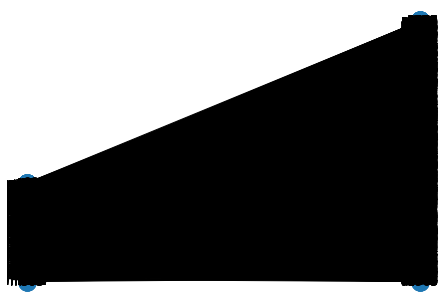

In [9]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

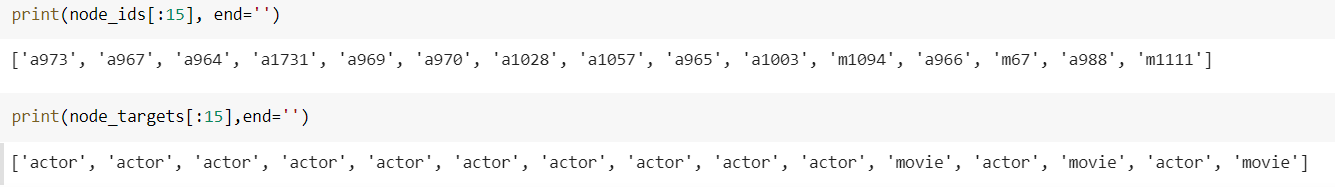

actor node movie node
actor embedding, movie embedding 
for range len node_ids
if m in node_ target[i]

In [16]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''

    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]

    for i in range (len(node_ids)):
      if 'm' in node_targets[i]:
          
          # here i m appending the node_ids into created variable movie _nodes 
        movie_nodes.append(node_ids[i])
           # here i m appending the node_embeddings into created variable movie_embeddings
        movie_embeddings.append(node_embeddings[i])
        
      else:
        # here i m appending the node_ids into created variable actor_nodes 
        actor_nodes.append(node_ids[i])
  # here i m appending the node_embeddings into created variable actor_embeddings 
        actor_embeddings.append(node_embeddings[i])

    

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [17]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)  # here we are splitting the data 


In [18]:
print(len(movie_nodes))  # checking the lenth of movie_nodes

1292


In [19]:
print(len(actor_nodes)) # checking the lenth of actor_nodes 

3411


<font color='cyan'>Grader function - 1</font>

In [20]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)



True

<font color='cyan'>Grader function - 2</font>

In [21]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [22]:
def cost_1(graph,cluster):
  # creating a variable gc grapg cluster 
  Gc = max(nx.connected_component_subgraphs(graph), key=len)

  # here we are checking the number of nodes connected to gc 
  connected=Gc.number_of_nodes()
  # here we are cheking the total number of nodes to graph 
  total_nodes=graph.number_of_nodes()

  # here we are calculating the cost1 as per formula given above 
  cost1=((1/cluster)*(connected/total_nodes))
  return cost1  

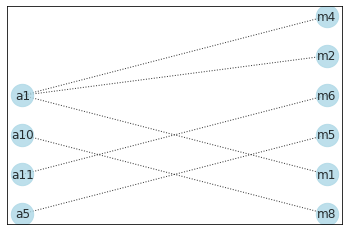

In [23]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)


<font color='cyan'>Grader function - 3</font>

In [24]:
graded_cost1=cost_1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) 
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [25]:
def cost_2(graph,cluster):

  # here we have computed the variable degree to compute the degree of graph 
  degree=graph.degree() 
  degree_value=0               # to store sum of all  degree of actor nodes
  mov_nodes=0                       #to store sum of all unique actor nodes
  for i in degree:
    if "a" in i[0]:

      degree_value=degree_value+i[1]
    else:
      
      mov_nodes=mov_nodes+1

      # here computing the cost 2 as per formula given above 
  cost_2=((1/cluster)*(degree_value/mov_nodes))
  return cost_2    

<font color='cyan'>Grader function - 4</font>

In [26]:
graded_cost2=cost_2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) 
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [27]:
from sklearn.cluster import KMeans
# importing kmeans algo rom sklearn 


In [79]:
cost_value={}
for cluster in [3,5,10,50,200,300,500]:
  cost1=0
  cost2=0
  label=[]

 #  refer : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  algo = KMeans(n_clusters=cluster)
  algo.fit(actor_embeddings)              # FITTING WITH KMEANS ALGO
  label=algo.labels_


  for i in range(cluster):
     G1=nx.Graph()  # drawing graph for each cluster
     label_division=[]

     k=[index for index, value in enumerate(label) if value == i]# accesing each cluster basesd on labels_
     label_division=[ actor_nodes[l] for l in k]
     for node in label_division:
       sub_graph1=nx.ego_graph(B,node)

       # refer : https://networkx.org/documentation/stable/tutorial.html
       G1.add_nodes_from(sub_graph1.nodes) # here we are adding nodes to G1
       G1.add_edges_from(sub_graph1.edges())# here we are adding the edges to G1

         # here our cluster 1 is a group1 " g1" of cluster
     cluster1=cost_1(G1,cluster) #

      # here we are calculating the cost 1 and that is our define variable cost1 + cluster1
     cost1=cost1+cluster1
      # calculating cost functions

# here also calculating the cluster 2 of group group 1
     cluster2=cost_2(G1,cluster) 

     # calculating the cost2 and that is define variable cost2+cluster2
     cost2=cost2+cluster2

  # now we will calculate the value of cost1 and cost2
  value_of_cost1_cost2=cost1*cost2 
  cost_value[cluster]=value_of_cost1_cost2   


In [80]:
perfect_cluster_number = max(cost_value, key=cost_value.get) 
print("perfect_cluster_number = ",perfect_cluster_number) #https://www.geeksforgeeks.org/python-get-key-with-maximum-value-in-dictionary/

perfect_cluster_number =  5


In [81]:
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

model= KMeans(n_clusters=perfect_cluster_number)
model.fit(actor_embeddings)
label=model.labels_

In [82]:
node_cluster={}

# taking range from variable perfect_cluster_number
for i in range(perfect_cluster_number):
  M=[index for index, value in enumerate(label) if value == i]  # getting the cluster number for each node
  label_division=[ actor_nodes[l] for l in M]
  # for each node in label_division 
  for node in label_division:
    node_cluster[node]=i

In [83]:
node_cluster['a1621']

1

<font color='blue'>Displaying similar actor clusters</font>

In [84]:
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

from sklearn.manifold import TSNE
transform = TSNE 
trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)

Text(0.5, 1.0, 'TSNE 2D visualization of actor embeddings')

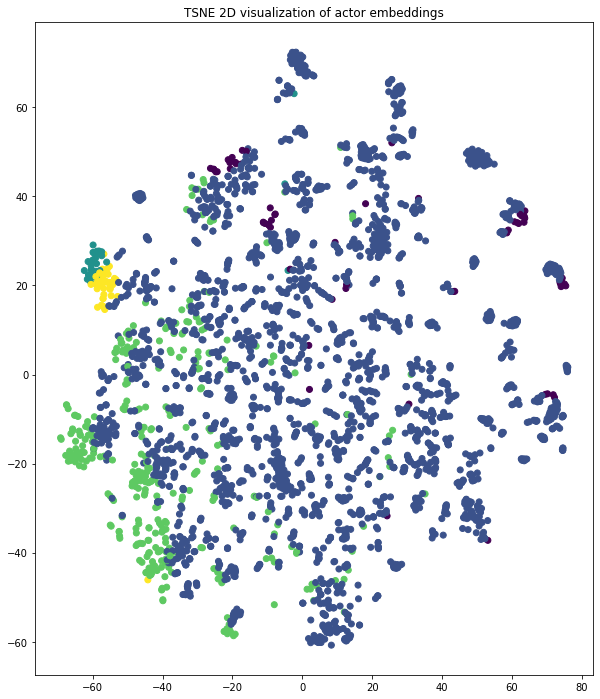

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))             # refer :  https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster
plt.scatter(actor_embeddings_2d[:,0], actor_embeddings_2d[:,1], c=model.labels_.astype(float))
plt.title('TSNE 2D visualization of actor embeddings')

<font color='blue'>Grouping similar movies</font>

In [67]:
def cost_2(graph,cluster):
  degree=graph.degree()

  # here we will store the sum of all degree of actor_nodes 
  degree_value=0 

   #to store sum of all unique actor nodes
  actor_nodes=0  
  for i in degree:
   if "m" in i[0]:
      # here will add the m in degree value 
      degree_value=degree_value+i[1]

   else:
      actor_nodes=actor_nodes+1

      
  value=((1/cluster)*(degree_value/actor_nodes))
  return value    

In [87]:
cost_value={}
for cluster in [3,5,10,50,200,300]:
  cost1=0
  cost2=0
  label=[]

 #  refer : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  algo = KMeans(n_clusters=cluster)
  algo.fit(movie_embeddings)              # FITTING WITH KMEANS ALGO
  label=algo.labels_


  for i in range(cluster):
     G1=nx.Graph()  # drawing graph for each cluster
     label_division=[]

     k=[index for index, value in enumerate(label) if value == i]# accesing each cluster basesd on labels_
     label_division=[ movie_nodes[l] for l in k]
     for node in label_division:
       sub_graph1=nx.ego_graph(B,node)

       # refer : https://networkx.org/documentation/stable/tutorial.html
       G1.add_nodes_from(sub_graph1.nodes) # here we are adding nodes to G1
       G1.add_edges_from(sub_graph1.edges())# here we are adding the edges to G1

         # here our cluster 1 is a group1 " g1" of cluster
     cluster1=cost_1(G1,cluster) #

      # here we are calculating the cost 1 and that is our define variable cost1 + cluster1
     cost1=cost1+cluster1
      # calculating cost functions

# here also calculating the cluster 2 of group group 1
     cluster2=cost_2(G1,cluster) 

     # calculating the cost2 and that is define variable cost2+cluster2
     cost2=cost2+cluster2

  # now we will calculate the value of cost1 and cost2
  value_of_cost1_cost2=cost1*cost2 
  cost_value[cluster]=value_of_cost1_cost2   

In [88]:
perfect_cluster_number = max(cost_value, key=cost_value.get) 
print("perfect_cluster_number = ",perfect_cluster_number) #https://www.geeksforgeeks.org/python-get-key-with-maximum-value-in-dictionary/

perfect_cluster_number =  3


In [89]:
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

model= KMeans(n_clusters=perfect_cluster_number)
# fitting the movie data
model.fit(movie_embeddings)

# labeling the model 
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
label=model.labels_

In [90]:
node_cluster={} # created the empty dict 

# taking range from variable perfect_cluster_number
for i in range(perfect_cluster_number):
  S=[index for index, value in enumerate(label) if value == i]  # getting the cluster number for each node
  label_division=[ movie_nodes[l] for l in S]
  for node in label_division: 
    node_cluster[node]=i

In [91]:
node_cluster['m890']

1

<font color='blue'>Displaying similar movie clusters</font>

In [92]:
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

from sklearn.manifold import TSNE 

transform = TSNE #PCA
trans_form = transform(n_components=2)
movie_embeddings_2d = trans_form.fit_transform(movie_embeddings)

# here i m using a tsne for visulization of clusters

Text(0.5, 1.0, '2D visualization of actor embeddings using TSNE ')

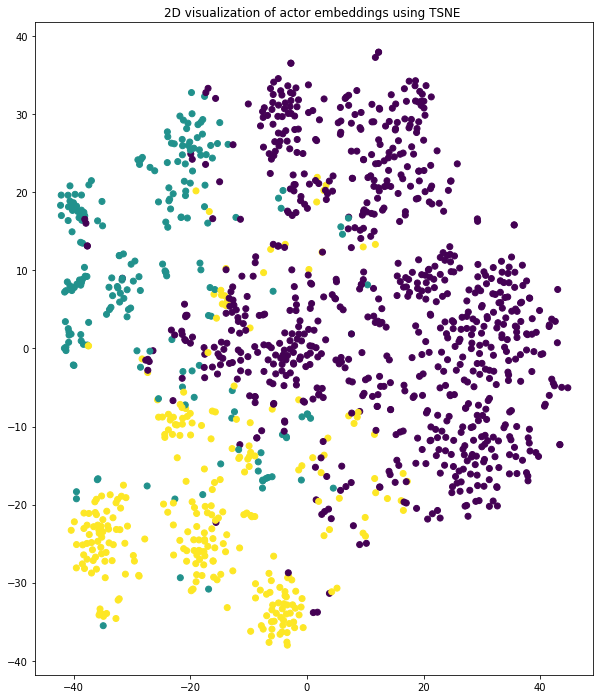

In [93]:
#refer : #https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster

import matplotlib.pyplot as plt

plt.figure(figsize=(10,12)) 
plt.scatter(movie_embeddings_2d[:,0], movie_embeddings_2d[:,1], c=model.labels_.astype(float))
plt.title('2D visualization of actor embeddings using TSNE ')